In [ ]:
import datetime as dt
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
# from scipy.stats import mannwhitneyu, ttest_ind

In [ ]:
# use science style 
plt.style.use(['science', 'no-latex', 'russian-font'])

# sns.set_palette('colorblind')
# sns.set_context('talk')
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size':16})

In [ ]:
LANGUAGE = "RU"
LANGUAGE = "EN"

In [ ]:
df = pd.read_excel('../data/organic_acids.xlsx', sheet_name='Лист1')
df = df.drop(columns=['Code'])

In [ ]:
df = df.round(4)

In [ ]:
df.groupby(['type']).var()

,days,Щавлевая,Фумаровая,Янтарная,Яблочная,Лимонная,Уксусная,Пропионовая,Молочная,Бензойная,Сорбиновая,Sum
type,,,,,,,,,,,,
bacteria,156.123377,0.015693,1.636364e-08,0.000031,0.000018,6.563636e-07,0.000000,0.000287,0.000044,2.414069e-07,1.636364e-08,0.016382
control,156.123377,0.000085,0.000000e+00,0.000043,0.000000,0.000000e+00,0.000450,0.000110,0.000183,1.472727e-07,0.000000e+00,0.001834
fungi,156.123377,0.000324,0.000000e+00,0.000071,0.000014,0.000000e+00,0.002142,0.002114,0.029683,1.386320e-06,3.149892e-06,0.038442


In [ ]:
df_grp_mean = df.groupby(['type','days'], as_index=False).mean()
df_grp_var = df.groupby(['type','days'], as_index=False).var()
df_grp_mean.groupby(['type']).sum()

,days,Щавлевая,Фумаровая,Янтарная,Яблочная,Лимонная,Уксусная,Пропионовая,Молочная,Бензойная,Сорбиновая,Sum
type,,,,,,,,,,,,
bacteria,133,0.390233,0.0002,0.008767,0.009133,0.001267,0.000000,0.035633,0.010400,0.001500,0.000200,0.457367
control,133,0.016900,0.0000,0.010233,0.000000,0.000000,0.058367,0.016367,0.021133,0.000600,0.000000,0.123567
fungi,133,0.139267,0.0000,0.019033,0.011933,0.000000,0.146967,0.247867,1.133433,0.005733,0.007567,1.711767


In [ ]:
df_mean = df_grp_mean.groupby(['type']).sum()
df_var = (df_grp_var.groupby(['type']).sum()/7)**1/2

In [ ]:
(df_mean.round(4).astype(str)+ '±' + df_var.round(4).astype(str)).to_excel('../data/table_8.xlsx')

In [ ]:
df_melted = pd.melt(df, id_vars= ['type', 'days'],
        value_vars=['Щавлевая', 'Фумаровая', 'Янтарная', 'Яблочная',
       'Лимонная', 'Уксусная', 'Пропионовая', 'Молочная', 'Бензойная',
       'Сорбиновая'])

In [ ]:
for_plot=df_melted.groupby(['type', 'variable'], as_index=False)['value'].mean()

In [ ]:

mask = for_plot['type']=='bacteria'
df = for_plot.loc[mask, ['variable', 'value']]

mask = for_plot['type']=='fungi'
df_2 = for_plot.loc[mask, ['variable', 'value']]

In [ ]:
for_plot

,type,variable,value
0,bacteria,Бензойная,0.000205
1,bacteria,Лимонная,0.000171
2,bacteria,Молочная,0.001418
3,bacteria,Пропионовая,0.004858
4,bacteria,Сорбиновая,0.000029
5,bacteria,Уксусная,0.000000
6,bacteria,Фумаровая,0.000028
7,bacteria,Щавлевая,0.053213
8,bacteria,Яблочная,0.001247
9,bacteria,Янтарная,0.001196


In [ ]:
df_for_plot = pd.concat([df, df_2.reset_index()['value']], axis=1)

In [ ]:
df_for_plot = df_for_plot.set_index('variable')
df_for_plot.columns = ['bacteria', 'fungi']

In [ ]:
df_for_plot

,bacteria,fungi
variable,,
Бензойная,0.000205,0.000790
Лимонная,0.000171,0.000000
Молочная,0.001418,0.154562
Пропионовая,0.004858,0.033803
Сорбиновая,0.000029,0.001026
Уксусная,0.000000,0.020037
Фумаровая,0.000028,0.000000
Щавлевая,0.053213,0.018983
Яблочная,0.001247,0.001632


In [ ]:
data.T

variable,Бензойная,Молочная,Пропионовая,Уксусная,Щавлевая,Яблочная,Янтарная
bacteria,0.000205,0.001418,0.004858,0.000000,0.053213,0.001247,0.001196
fungi,0.000790,0.154562,0.033803,0.020037,0.018983,0.001632,0.002593


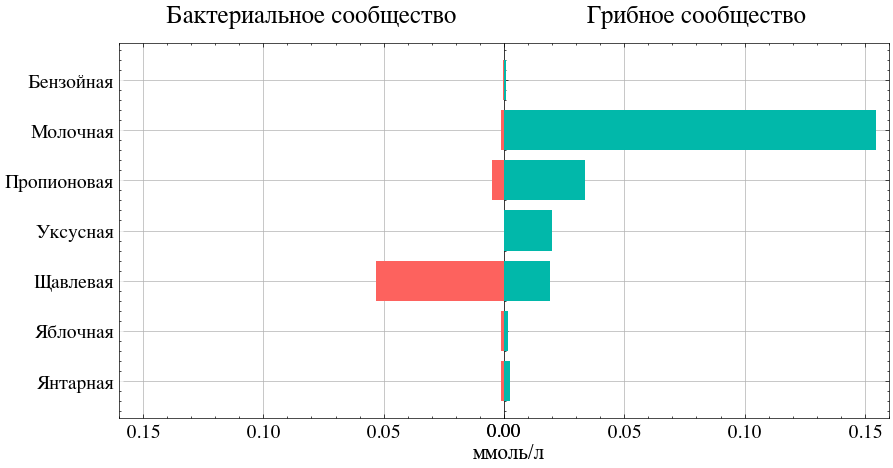

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
#sns.set()
#%matplotlib notebook
#plt.style.use('classic')

# class_list = ['test1','test2','test3','test4','test5','test6','test7']
# data = pd.DataFrame(data=zip(class_list,average_length,num_entries),columns=['Class','Lens','Nums'])
# data.set_index('Class', inplace=True)

data = df_for_plot.copy()
data = data.loc[~data.index.isin(['Лимонная','Фумаровая', 'Сорбиновая'])]
font_color = '#525252'
hfont = {'fontname':'Times'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = data.index
column0 = data['bacteria']
column1 = data['fungi']
title0 = "Бактериальное сообщество"
title1 = 'Грибное сообщество'

fig, axes = plt.subplots(figsize=(10,5), ncols=2,sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, **hfont)


# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 


# To show data from highest to lowest
plt.gca().invert_yaxis()

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

# axes[1].set_xticklabels(['0','20', '40', '60', '80', '100', '120'])

axes[0].set_xlim(0.16,0)
axes[1].set_xlim(0.0,0.16)

# axes[1].set_xscale('linear')
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=14, color='black', **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=14, **hfont)
axes[1].grid()
axes[0].grid()
fig.supxlabel('ммоль/л', x=0.57, fontsize=15,  **hfont)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
# plt.savefig('../plots/Acids_Bacteria_vs_Fungi.png', dpi=300)
plt.show()

In [ ]:
df_for_bar

,variable,type,mean,var
0,Sum,bacteria,9.099364,1.563585e-02
1,Sum,control,9.076609,1.751291e-03
2,Sum,fungi,9.184895,3.669462e-02
3,Бензойная,bacteria,9.068284,2.332954e-07
4,Бензойная,control,9.068223,1.415831e-07
5,Бензойная,fungi,9.068577,1.316067e-06
6,Лимонная,bacteria,9.068267,6.158733e-07
7,Лимонная,control,9.068182,0.000000e+00
8,Лимонная,fungi,9.068182,0.000000e+00
9,Молочная,bacteria,9.068891,4.222113e-05


In [ ]:
species_namer = {'bacteria': 'Бактерии', 
              'control':'Контроль', 
              'fungi':'Грибы'}

df_melted['type_ru'] = df_melted['type'].apply(lambda x: species_namer[x])
df_melted['type_ru'].unique()

array(['Бактерии', 'Грибы', 'Контроль'], dtype=object)

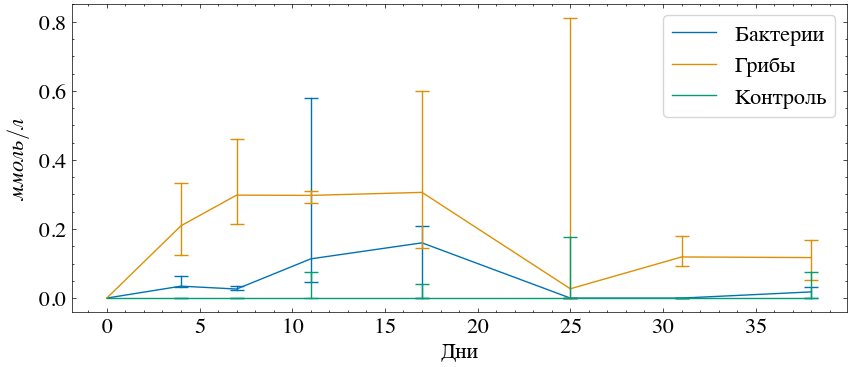

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
# type = 'bacteria'
mask = (df_melted['variable']=='Sum') #& (df_melted['type']==type)
sns.lineplot(data=df_melted.loc[mask],
             errorbar=lambda x: (x.min(), x.max()),
                err_style='bars',
                 estimator='median',
             err_kws={'capsize':5, 'elinewidth': 1},
             y='value', x='days', hue='type_ru')
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
# ax.text(0.03, 0.95, type.capitalize(), transform=ax.transAxes, fontsize=16,
#             verticalalignment='top', bbox=props)
leg=ax.legend(frameon=True)  
ax.set_ylabel('$ммоль/л$')
ax.set_xlabel('Дни')
plt.savefig('../plots/organic_acids_bacteria_RU.png', dpi=300)
plt.show()